# Random Sampling

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## SciPy Statistical Functions

The NumPy subpackage `numpy.random` contains random number generators and all the usual distributions. The SciPy module `scipy.stats` is built on top of `numpy.random` and also includes several useful functions for working with probability distributions. Therefore we choose to use `scipy.stats` to generate random samples from probability distributions and to plot probability density functions.

### Distribution Objects

The module `scipy.stats` includes a Python object for each of the usual probability distributions. We can think of each object as representing an infinite family of distributions. Each distribution object includes a standard distribution and all other distributions in the family are determined by setting values of shape parameters (see `loc` and `scale` below).

`scipy.stats.norm` represents the family of normal distributions $N(\mu,\sigma^2)$ and the standard density function is

$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
$$

`scipy.stats.uniform` represents the family of uniform distributions $U(a,b)$ and the standard density function is

$$
f(x) = \left\{ \begin{array}{ccc} 1 & , & 0 \le x \le 1 \\ 0 & , & \text{otherwise} \end{array} \right.
$$

`scipy.stats.expon` represents the family of exponential distributions $Exp(\lambda)$ and the standard density function is

$$
f(x) = \left\{ \begin{array}{ccc} e^{-x} & , & x \ge 0 \\ 0 & , & x < 0 \end{array} \right.
$$

`scipy.stats.gamma` represents the family of gamma distributions $\Gamma(\alpha,\beta)$ and the standard density function with shape parameter $\alpha$ is

$$
f(x,\alpha) = \left\{ \begin{array}{ccc} \displaystyle \frac{x^{\alpha-1} e^{-x}}{\Gamma(\alpha)} & , & x \ge 0 \\ 0 & , & x < 0 \end{array} \right.
$$

where $\Gamma(x)$ is the gamma function.

### Density Function

Each distribution object has a `pdf` function with the standard density function $f(x)$ for the distribution and parameters `loc` and `scale` such that `pdf` is the corresponding density function:

$$
\frac{1}{\mathtt{scale}} \ f\left( \frac{x - \mathtt{loc}}{\mathtt{scale}} \right)
$$

As function transformations, the result is first scale by `scale` and then shift by `loc`.

### Sampling Function

Each distribution object includes a function `rvs` to generate random samples from the distribution. The name `rvs` refers to "random variables". The parameters `loc` and `scale` determine the form the probability ditribution and the parameter `N` specifices the number of samples.

:::{seealso}
Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) for `scipy.stats`.
:::

## Normal Distribution

The object `scipy.stats.norm` is the Python object for the family of normal distribuitions $N(\mu,\sigma^2)$. In this case, the parameter `loc` is the mean $\mu$ and `scale` is the standard deviation $\sigma$. Let's use `scipy.stats.norm.pdf` to plot the density functions for different means and variances.

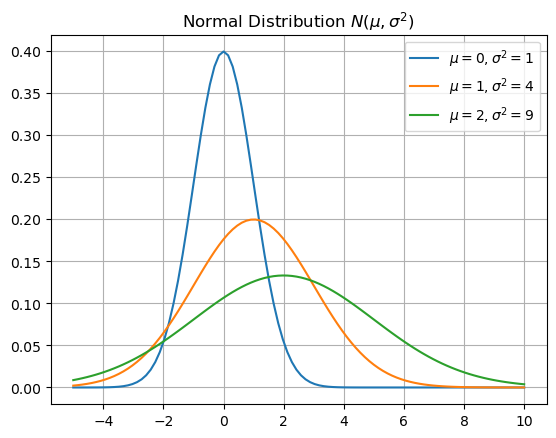

In [92]:
x = np.linspace(-5,10,100)
y0 = stats.norm.pdf(x,loc=0,scale=1)
y1 = stats.norm.pdf(x,loc=1,scale=2)
y2 = stats.norm.pdf(x,loc=2,scale=3)
plt.plot(x,y0,x,y1,x,y2)
plt.title('Normal Distribution $N(\mu,\sigma^2)$')
plt.legend(['$\mu=0,\sigma^2=1$','$\mu=1,\sigma^2=4$','$\mu=2,\sigma^2=9$'])
plt.grid(True)
plt.show()

Let's use the function `scipy.stats.norm.rvs` to generate random samples from the normal distribution $N(\mu,\sigma^2)$, plot a histrogram of the samples and plot the corresonding probability density function.

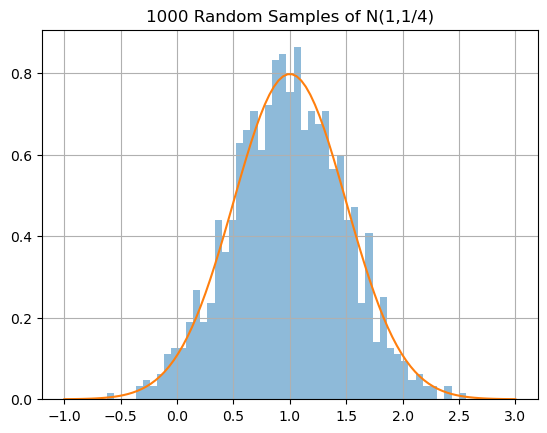

In [240]:
N = 1000; mu = 1.; sigma = 0.5;
X = stats.norm.rvs(loc=mu,scale=sigma,size=N)
plt.hist(X,bins=50,density=True,alpha=0.5), plt.grid(True)
x = np.linspace(-1,3,100)
y = stats.norm.pdf(x,loc=mu,scale=sigma)
plt.plot(x,y)
plt.title('1000 Random Samples of N(1,1/4)')
plt.show()

## Uniform Distribution

The object `scipy.stats.uniform` is the Python object for the family of uniform distribuitions $U(a,b)$. In this case, the parameter `loc` corresponds to $a$ and `scale` is $b-a$. Let's use `scipy.stats.uniform.pdf` to plot the density functions for different values $a$ and $b$.

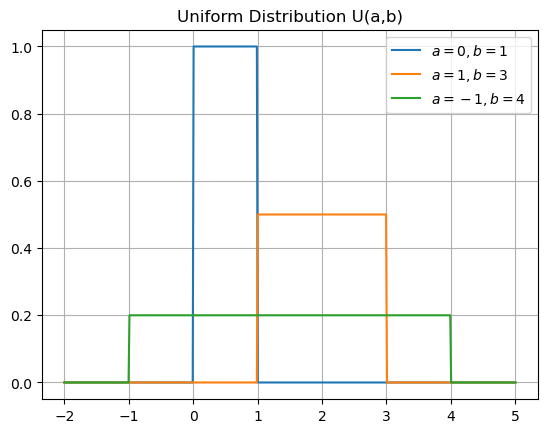

In [106]:
x = np.linspace(-2,5,500)
y0 = stats.uniform.pdf(x,loc=0,scale=1)
y1 = stats.uniform.pdf(x,loc=1,scale=2)
y2 = stats.uniform.pdf(x,loc=-1,scale=5)
plt.plot(x,y0,x,y1,x,y2)
plt.title('Uniform Distribution U(a,b)')
plt.legend(['$a=0,b=1$','$a=1,b=3$','$a=-1,b=4$']), plt.grid(True)
plt.show()

Let's use the function `scipy.stats.uniform.rvs` to generate random samples from the normal distribution $U(a,b)$, plot a histrogram of the samples and plot the corresonding probability density function.

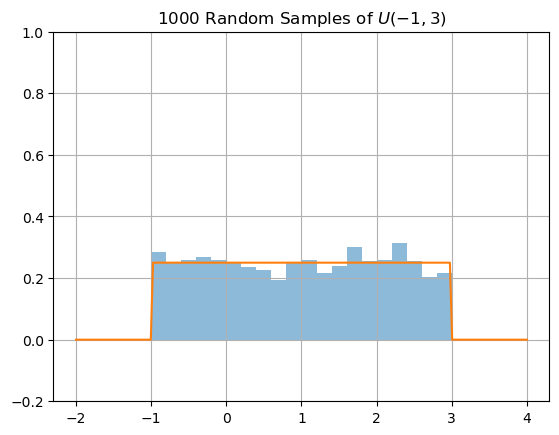

In [239]:
N = 1000; a = -1.; b = 3;
X = stats.uniform.rvs(loc=a,scale=(b-a),size=N)
plt.hist(X,bins=20,density=True,alpha=0.5), plt.grid(True)
x = np.linspace(-2,4,200)
y = stats.uniform.pdf(x,loc=a,scale=(b-a))
plt.plot(x,y)
plt.ylim([-0.2,1.0]), plt.title('1000 Random Samples of $U(-1,3)$')
plt.show()

## Exponential Distribution

The object `scipy.stats.expon` is the Python object for the exponential distribution $Exp(\lambda)$. In this case, the parameter `scale` corresponds to $1/\lambda$. Let's use `scipy.stats.expon.pdf` to plot the density functions for different values $\lambda$.

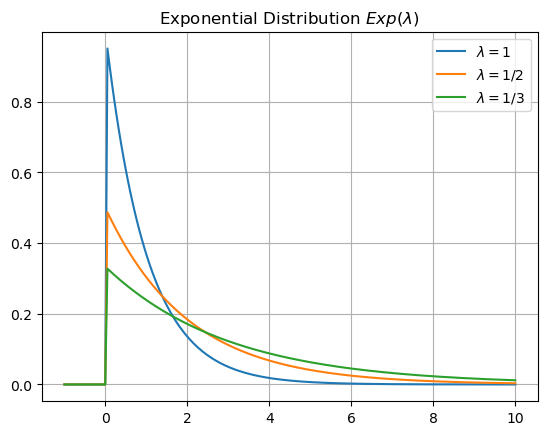

In [125]:
x = np.linspace(-1,10,200)
y0 = stats.expon.pdf(x,loc=0,scale=1)
y1 = stats.expon.pdf(x,loc=0,scale=2)
y2 = stats.expon.pdf(x,loc=0,scale=3)
plt.plot(x,y0,x,y1,x,y2)
plt.title('Exponential Distribution $Exp(\lambda)$')
plt.legend(['$\lambda=1$','$\lambda=1/2$','$\lambda=1/3$']), plt.grid(True)
plt.show()

Let's use the function `scipy.stats.expon.rvs` to generate random samples from the normal distribution $Exp(\lambda)$, plot a histrogram of the samples and plot the corresonding probability density function.

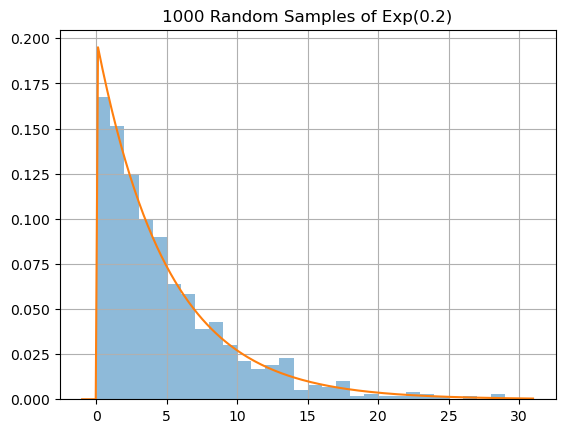

In [238]:
N = 1000; lam = 0.2;
X = stats.expon.rvs(loc=0.,scale=1/lam,size=N)
plt.hist(X,bins=range(30),density=True,alpha=0.5), plt.grid(True)
x = np.linspace(-1,31,200)
y = stats.expon.pdf(x,loc=0.,scale=1/lam)
plt.plot(x,y)
plt.title('1000 Random Samples of Exp(0.2)')
plt.show()

## Gamma Distribution

The object `scipy.stats.gamma` is the Python object for the gamma distribution $\Gamma(\alpha,\beta)$. In this case, we must specify $\alpha$ as a shape parameter and the parameter `scale` corresponds to $1/\beta$. Let's use `scipy.stats.gamma.pdf` to plot the density functions for different values $\alpha$ and $\beta$.

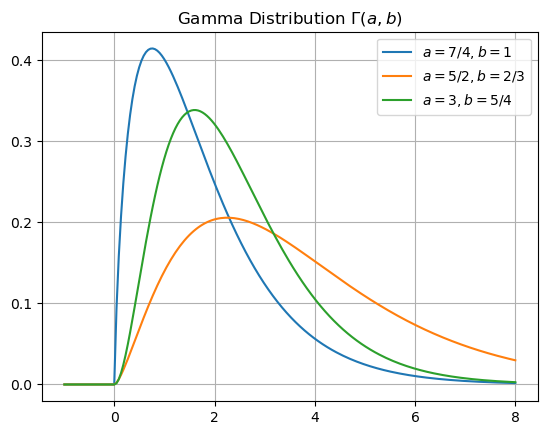

In [160]:
x = np.linspace(-1,8,200)
y0 = stats.gamma.pdf(x,1.75,loc=0,scale=1)
y1 = stats.gamma.pdf(x,2.5,loc=0,scale=1.5)
y2 = stats.gamma.pdf(x,3,loc=0,scale=0.8)
plt.plot(x,y0,x,y1,x,y2)
plt.title('Gamma Distribution $\Gamma(a,b)$')
plt.legend(['$a=7/4,b=1$','$a=5/2,b=2/3$','$a=3,b=5/4$']), plt.grid(True)
plt.show()

Let's use the function `scipy.stats.gamma.rvs` to generate random samples from the normal distribution $\Gamma(\alpha,\beta)$, plot a histrogram of the samples and plot the corresonding probability density function.

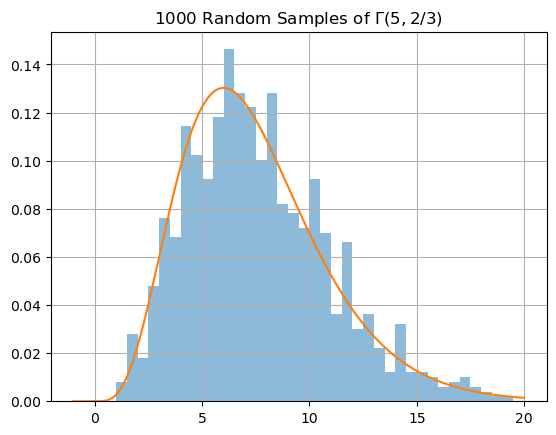

In [237]:
N = 1000; alpha = 5; beta = 2/3;
X = stats.gamma.rvs(alpha,loc=0.,scale=1/beta,size=N)
plt.hist(X,bins=np.arange(0,20,0.5),density=True,alpha=0.5), plt.grid(True)
x = np.linspace(-1,20,200)
y = stats.gamma.pdf(x,alpha,loc=0.,scale=1/beta)
plt.plot(x,y)
plt.title('1000 Random Samples of $\Gamma(5,2/3)$')
plt.show()

## Functions of Random Variables

Let $X_1,\dots,X_n$ be (independent) continuous random variables and let $g : \mathbb{R}^n \rightarrow \mathbb{R}$ be a function. Then $Y = g(X_1,\dots,X_n)$ is also a random variable and we would like to find its probability density function $f_Y(x)$. There is a closed form solution in the case that $n=1$ and $g$ is an invertible function however there is no explicit formula for $f_Y$ in general. So what can we do? Generate random samples of $X_1,\dots,X_n$, compute $Y = g(X_1,\dots,X_n)$ for each sample and plot the distribution of values $Y$. This generates an approximation of the $f_Y$. In particular, the function `plt.hist(Y,density=True)` creates the histogram of the samples in `Y` and it also returns 3 values: array of relative frequency values, array of bin edges and the figure object. Compute the midpoint of each bin and plot the corresponding relative frequency to obtain an approximation of the density function. The result is not smooth and there are better methods for approximating the density function $f_Y$ such as kernel density estimation which we will see in later sections.

For example, let's apply this method to the standard normal distribution:

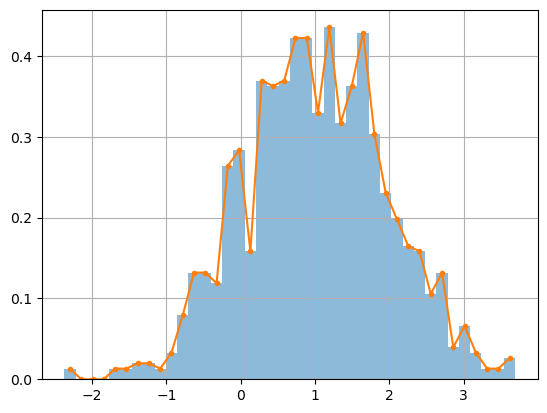

In [242]:
N = 1000
X = stats.norm.rvs(loc=1,scale=1,size=N)
freqs,bins,_ = plt.hist(X,bins=40,density=True,alpha=0.5)
mids = (bins[:-1] + bins[1:])/2
plt.plot(mids,freqs,'.-')
plt.grid(True)
plt.show()

:::{seealso}
Check out [Wikipedia: Functions of Random Variables](https://en.wikipedia.org/wiki/Random_variable#Functions_of_random_variables) for more details.
:::

### Example: Sum of Normal Variables

Let $X_1 \sim N(\mu_1,\sigma^2_1)$ and $X_2 \sim N(\mu_2,\sigma^2_2)$ be normal random variables and let $Y = X_1 + X_2$. It can be shown that $Y \sim N(\mu_1 + \mu_2,\sigma^2_1 + \sigma^2_2)$ however let's compute random samples and plot the histogram.

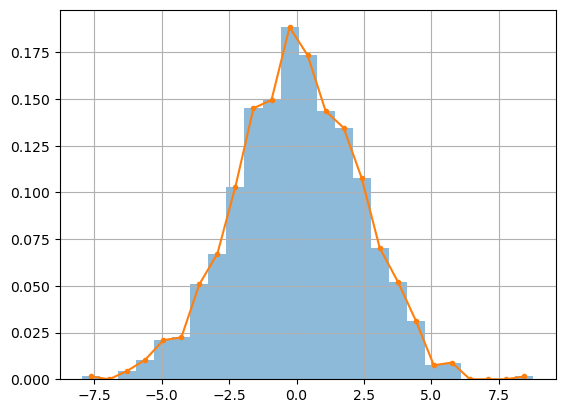

In [253]:
N = 1000
X1 = stats.norm.rvs(loc=-1,scale=1,size=N)
X2 = stats.norm.rvs(loc=1,scale=2,size=N)
Y = X1 + X2
freqs,bins,_ = plt.hist(Y,bins=25,density=True,alpha=0.5)
mids = (bins[:-1] + bins[1:])/2
plt.plot(mids,freqs,'.-')
plt.grid(True)
plt.show()

### Example: Norm of Normal Variables

Let $X_1 \sim N(\mu_1,\sigma^2_1)$ and $X_2 \sim N(\mu_2,\sigma^2_2)$ be normal random variables and let $Y = \sqrt{X_1^2 + X_2^2}$. Then $Y$ is given by the [chi distribiution](https://en.wikipedia.org/wiki/Chi_distribution). Let's compute random samples and plot the histogram.

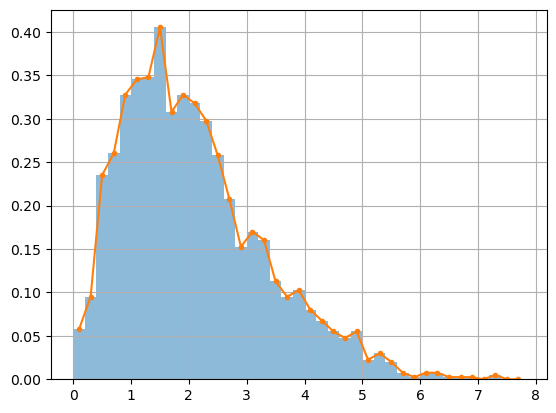

In [249]:
N = 2000
X1 = stats.norm.rvs(loc=0,scale=1,size=N)
X2 = stats.norm.rvs(loc=1,scale=2,size=N)
Y = np.sqrt(X1**2 + X2**2)
freqs,bins,_ = plt.hist(Y,bins=np.arange(0,8,0.2),density=True,alpha=0.5)
mids = (bins[:-1] + bins[1:])/2
plt.plot(mids,freqs,'.-')
plt.grid(True)
plt.show()